In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# import matplotlib.ticker as mticker

import numpy as np
import xarray as xr
import pandas as pd
import os
import arrow

In [3]:
ds = xr.open_dataset("H:/ecmwf/202301/era5-single-202301.nc")
sst = ds['sst']
u10 = ds['u10']
v10 = ds['v10']
t2m = ds['t2m']
d2m = ds['d2m']

In [4]:
time = ds['time']
print(time)

<xarray.DataArray 'time' (time: 144)>
array(['2023-01-11T00:00:00.000000000', '2023-01-11T01:00:00.000000000',
       '2023-01-11T02:00:00.000000000', '2023-01-11T03:00:00.000000000',
       '2023-01-11T04:00:00.000000000', '2023-01-11T05:00:00.000000000',
       '2023-01-11T06:00:00.000000000', '2023-01-11T07:00:00.000000000',
       '2023-01-11T08:00:00.000000000', '2023-01-11T09:00:00.000000000',
       '2023-01-11T10:00:00.000000000', '2023-01-11T11:00:00.000000000',
       '2023-01-11T12:00:00.000000000', '2023-01-11T13:00:00.000000000',
       '2023-01-11T14:00:00.000000000', '2023-01-11T15:00:00.000000000',
       '2023-01-11T16:00:00.000000000', '2023-01-11T17:00:00.000000000',
       '2023-01-11T18:00:00.000000000', '2023-01-11T19:00:00.000000000',
       '2023-01-11T20:00:00.000000000', '2023-01-11T21:00:00.000000000',
       '2023-01-11T22:00:00.000000000', '2023-01-11T23:00:00.000000000',
       '2023-01-12T00:00:00.000000000', '2023-01-12T01:00:00.000000000',
       '2023-

In [17]:
time_range=pd.period_range(start='2023-01-11 00:00', end='2023-01-15 12:00', freq='6H').to_timestamp()
print(time_range)

DatetimeIndex(['2023-01-11 00:00:00', '2023-01-11 06:00:00',
               '2023-01-11 12:00:00', '2023-01-11 18:00:00',
               '2023-01-12 00:00:00', '2023-01-12 06:00:00',
               '2023-01-12 12:00:00', '2023-01-12 18:00:00',
               '2023-01-13 00:00:00', '2023-01-13 06:00:00',
               '2023-01-13 12:00:00', '2023-01-13 18:00:00',
               '2023-01-14 00:00:00', '2023-01-14 06:00:00',
               '2023-01-14 12:00:00', '2023-01-14 18:00:00',
               '2023-01-15 00:00:00', '2023-01-15 06:00:00',
               '2023-01-15 12:00:00'],
              dtype='datetime64[ns]', freq='6H')


In [18]:
time_range[0]

Timestamp('2023-01-11 00:00:00', freq='6H')

In [9]:
print(sst)

<xarray.DataArray 'sst' (time: 144, latitude: 361, longitude: 281)>
[14607504 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 2023-01-11 ... 2023-01-16T23:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature


In [19]:
time_selected = time_range[12]
sst_sd = sst.sel(time=time_selected)
u10_sd = u10.sel(time=time_selected)
v10_sd = v10.sel(time=time_selected)
t2m_sd = t2m.sel(time=time_selected)
d2m_sd = d2m.sel(time=time_selected)

In [22]:
shapefiles_dir = 'H:/github/python/seafog/data/shapefiles/'

In [25]:
print(sst)

<xarray.DataArray 'sst' (time: 144, latitude: 361, longitude: 281)>
[14607504 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 2023-01-11 ... 2023-01-16T23:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature


保存图片: H:\github\python\seafog\img\2023\01\sst_2023011408.jpg


<Figure size 432x288 with 0 Axes>

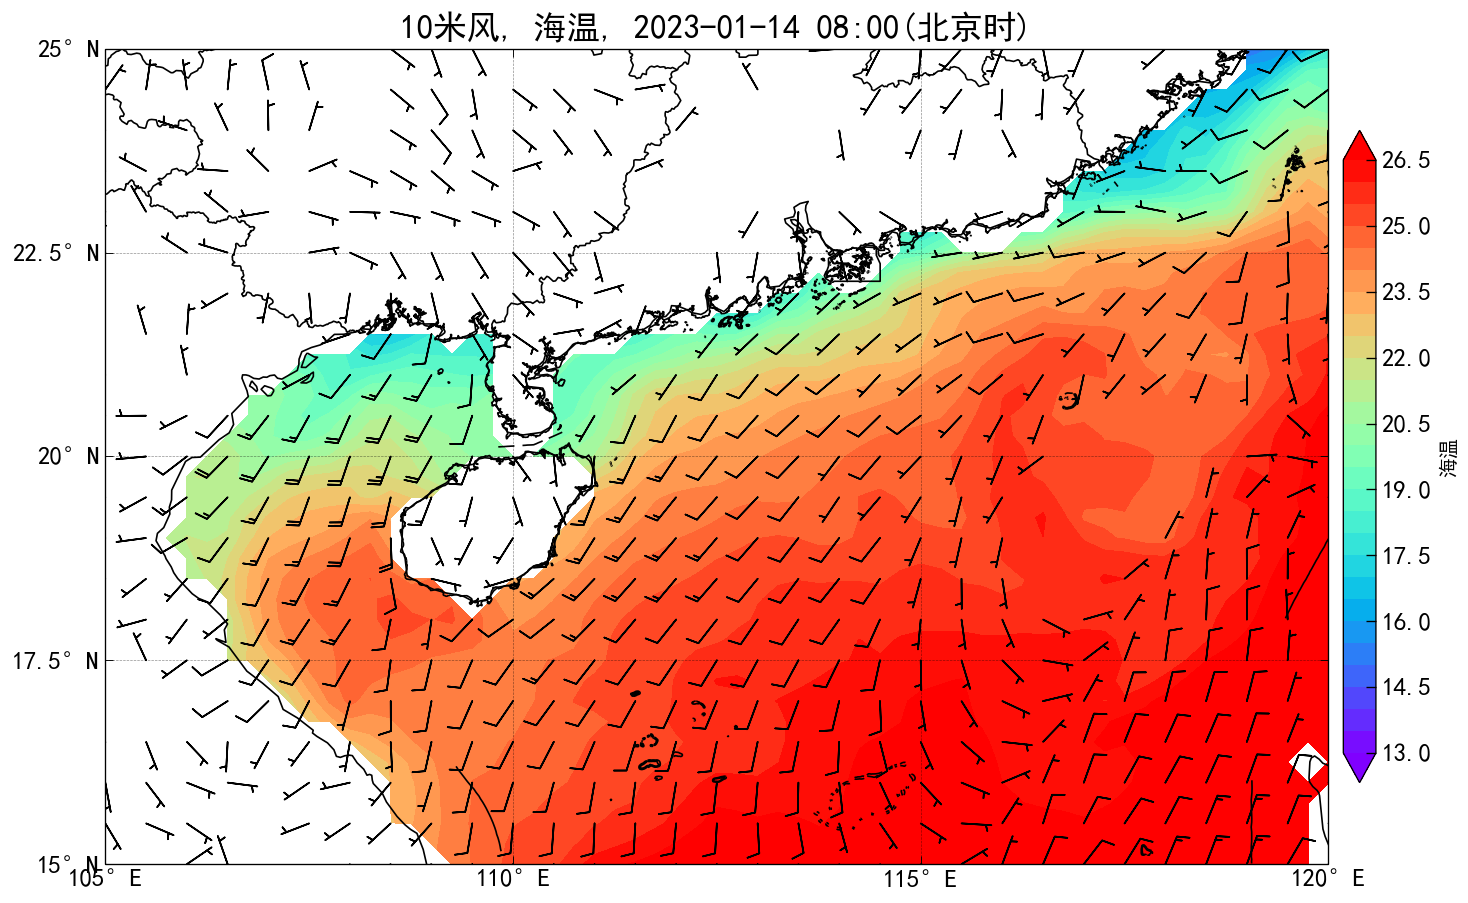

In [55]:
plt.clf()
lon=sst.coords['longitude'][:]#读取经度
lat=sst.coords['latitude'][:]#读取纬度
# lons,lats=np.meshgrid(lon,lat)#网格化
figure = plt.figure(figsize=(16, 9), dpi=120)  # 加载画布
map_fig = plt.axes(projection=ccrs.PlateCarree())  # 设置投影方式
shpFilePath01  = os.path.join(shapefiles_dir, './natural_earth/physical/ne_50m_coastline.shp')
coastmap = shpreader.Reader(shpFilePath01).geometries()  # 读取地图数据

map_fig.add_geometries(coastmap, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')  # 设置边界样式

shpFilePath02  = os.path.join(shapefiles_dir, './china_basic_map/bou2_4l.shp')
chinamap = shpreader.Reader(shpFilePath02).geometries()  # 读取地图数据
map_fig.set_extent([105, 120, 15, 25], crs=ccrs.PlateCarree())  # 设置绘图范围
map_fig.add_geometries(chinamap, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='black')  # 设置边界样式

    
map_fig.set_xticks([105, 110, 115, 120])  # 需要显示的经度，一般可用np.arange
map_fig.set_yticks([15, 17.5, 20, 22.5, 25])  # 需要显示的纬度
map_fig.xaxis.set_major_formatter(LongitudeFormatter())  # 将横坐标转换为经度格式
map_fig.yaxis.set_major_formatter(LatitudeFormatter())  # 将纵坐标转换为纬度格式
map_fig.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)  # 修改刻度样式
map_fig.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

# 填色图
range_sst_cf = np.arange(13, 27, 0.5)
sst_cf = map_fig.contourf(lon, lat, sst_sd-273.15, levels=range_sst_cf, cmap='rainbow',extend='both')
step = 2
uv_barb = map_fig.barbs(lon[::step], lat[::step], 
        u10_sd[::step,::step],v10_sd[::step,::step],barb_increments={'half':2,'full':4,'flag':20},
        length=6,sizes={'emptybarb':0}
        )
# 色标
cb = figure.colorbar(sst_cf, extend='max', shrink=0.8, pad=0.01)
cb.set_label('海温', fontdict={'size': 12})
cb.ax.tick_params(which='major', direction='in', length=6, labelsize=15)

# 设置文字标题 Set the titles and axes labels
utcTime = arrow.get(time_selected)
bjTime = utcTime.shift(hours=8)
map_fig.set_title(f'10米风, 海温, {bjTime.format("YYYY-MM-DD HH:00")}(北京时)', fontsize=20)

# 保存图像
imgDir = os.path.join('H:/github/python/seafog/img/2023/', f'./01/')
imgDir = os.path.normpath(imgDir)
imgPath = os.path.join(imgDir, f'sst_{bjTime.format("YYYYMMDDHH")}.jpg')
plt.savefig(imgPath, format='jpg', bbox_inches='tight', transparent=True)
print('保存图片: ' + imgPath)
plt.show()
plt.close(figure)

<Figure size 432x288 with 0 Axes>

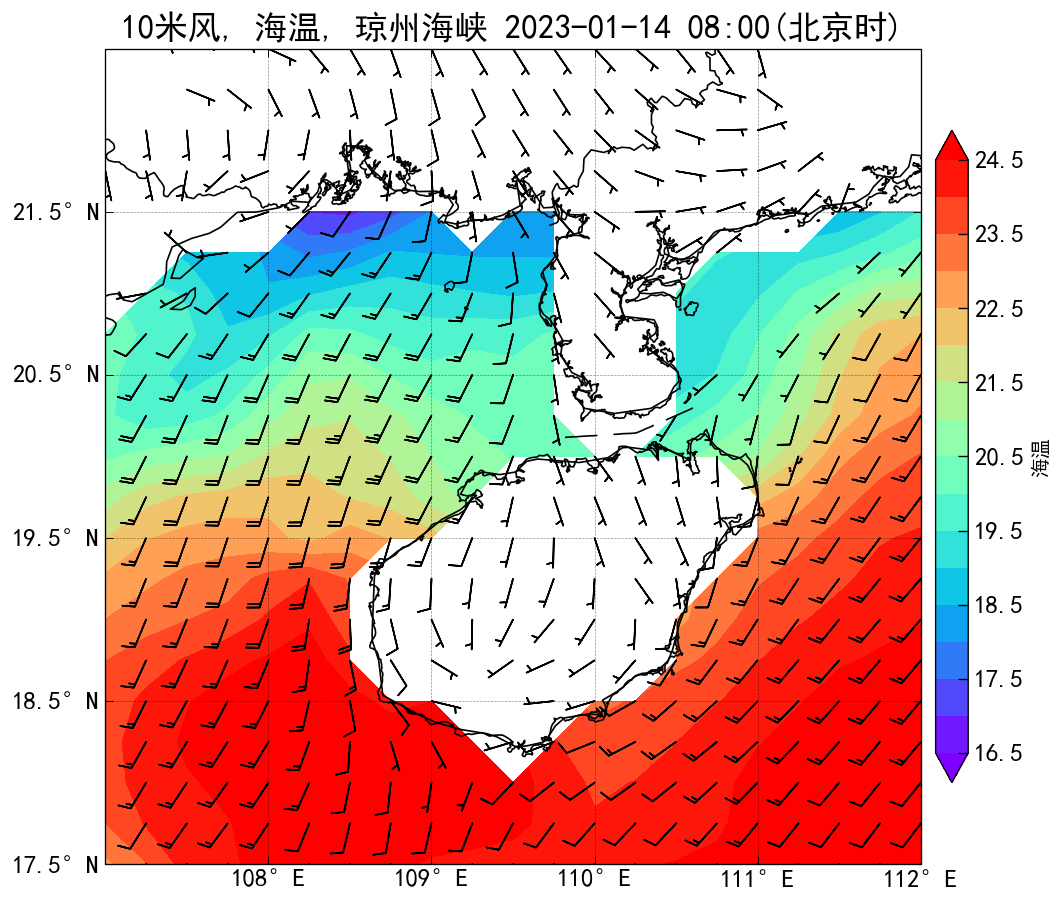

In [60]:
plt.clf()
lon=sst.coords['longitude'][:]#读取经度
lat=sst.coords['latitude'][:]#读取纬度
# lons,lats=np.meshgrid(lon,lat)#网格化
figure = plt.figure(figsize=(16, 9), dpi=120)  # 加载画布
map_fig = plt.axes(projection=ccrs.PlateCarree())  # 设置投影方式
shpFilePath01  = os.path.join(shapefiles_dir, './natural_earth/physical/ne_50m_coastline.shp')
coastmap = shpreader.Reader(shpFilePath01).geometries()  # 读取地图数据

map_fig.add_geometries(coastmap, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')  # 设置边界样式

shpFilePath02  = os.path.join(shapefiles_dir, './china_basic_map/bou2_4l.shp')
chinamap = shpreader.Reader(shpFilePath02).geometries()  # 读取地图数据
map_fig.set_extent([107, 112, 17.5, 22.5], crs=ccrs.PlateCarree())  # 设置绘图范围
map_fig.add_geometries(chinamap, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='black')  # 设置边界样式
map_fig.set_xticks([108, 109, 110,111,112])  # 需要显示的经度，一般可用np.arange
map_fig.set_yticks([17.5, 18.5, 19.5, 20.5,21.5])  # 需要显示的纬度
map_fig.xaxis.set_major_formatter(LongitudeFormatter())  # 将横坐标转换为经度格式
map_fig.yaxis.set_major_formatter(LatitudeFormatter())  # 将纵坐标转换为纬度格式
map_fig.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)  # 修改刻度样式
map_fig.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

# 填色图
range_sst_cf = np.arange(16.5, 25, 0.5)
sst_cf = map_fig.contourf(lon, lat, sst_sd-273.15, levels=range_sst_cf, cmap='rainbow',extend='both')
step = 1
uv_barb = map_fig.barbs(lon[::step], lat[::step], 
        u10_sd[::step,::step],v10_sd[::step,::step],barb_increments={'half':2,'full':4,'flag':20},
        length=6,sizes={'emptybarb':0}
        )
# 色标
cb = figure.colorbar(sst_cf, extend='max', shrink=0.8, pad=0.01)
cb.set_label('海温', fontdict={'size': 12})
cb.ax.tick_params(which='major', direction='in', length=6, labelsize=15)

# 设置文字标题 Set the titles and axes labels
utcTime = arrow.get(time_selected)
bjTime = utcTime.shift(hours=8)
map_fig.set_title(f'10米风, 海温, 琼州海峡 {bjTime.format("YYYY-MM-DD HH:00")}(北京时)', fontsize=20)

# 保存图像
# imgDir = os.path.join('H:/github/python/seafog/img/2023/', f'./01/')
# imgDir = os.path.normpath(imgDir)
# imgPath = os.path.join(imgDir, f'sst_{bjTime.format("YYYYMMDDHH")}.jpg')
# plt.savefig(imgPath, format='jpg', bbox_inches='tight', transparent=True)
# print('保存图片: ' + imgPath)
plt.show()
plt.close(figure)

<Figure size 432x288 with 0 Axes>

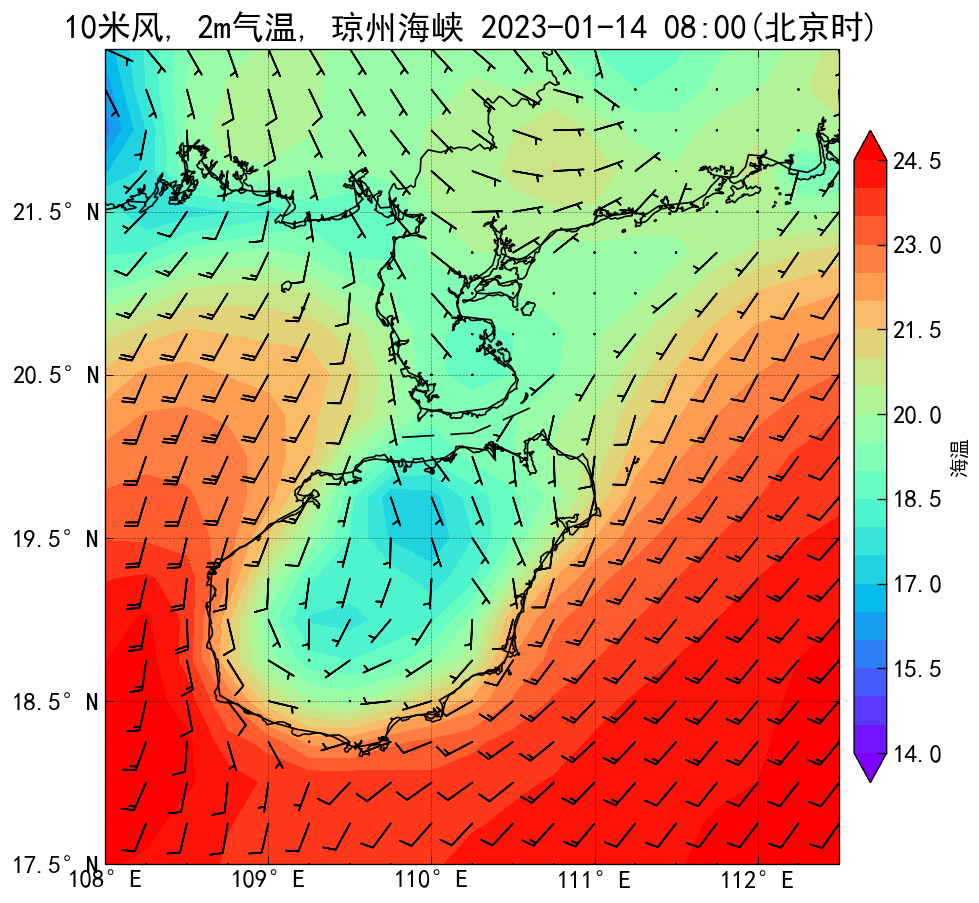

In [66]:
plt.clf()
lon=sst.coords['longitude'][:]#读取经度
lat=sst.coords['latitude'][:]#读取纬度
# lons,lats=np.meshgrid(lon,lat)#网格化
figure = plt.figure(figsize=(16, 9), dpi=120)  # 加载画布
map_fig = plt.axes(projection=ccrs.PlateCarree())  # 设置投影方式
shpFilePath01  = os.path.join(shapefiles_dir, './natural_earth/physical/ne_50m_coastline.shp')
coastmap = shpreader.Reader(shpFilePath01).geometries()  # 读取地图数据

map_fig.add_geometries(coastmap, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')  # 设置边界样式

shpFilePath02  = os.path.join(shapefiles_dir, './china_basic_map/bou2_4l.shp')
chinamap = shpreader.Reader(shpFilePath02).geometries()  # 读取地图数据
map_fig.set_extent([108, 112.5, 17.5, 22.5], crs=ccrs.PlateCarree())  # 设置绘图范围
map_fig.add_geometries(chinamap, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='black')  # 设置边界样式
map_fig.set_xticks([108, 109, 110,111,112])  # 需要显示的经度，一般可用np.arange
map_fig.set_yticks([17.5, 18.5, 19.5, 20.5,21.5])  # 需要显示的纬度
map_fig.xaxis.set_major_formatter(LongitudeFormatter())  # 将横坐标转换为经度格式
map_fig.yaxis.set_major_formatter(LatitudeFormatter())  # 将纵坐标转换为纬度格式
map_fig.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)  # 修改刻度样式
map_fig.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

# 填色图
range_cf = np.arange(14, 25, 0.5)
# sst_cf = map_fig.contourf(lon, lat, sst_sd-273.15, levels=range_sst_cf, cmap='rainbow',extend='both')
cf = map_fig.contourf(lon, lat, t2m_sd-273.15, levels=range_cf,cmap='rainbow',extend='both')
step = 1
uv_barb = map_fig.barbs(lon[::step], lat[::step], 
        u10_sd[::step,::step],v10_sd[::step,::step],barb_increments={'half':2,'full':4,'flag':20},
        length=6,sizes={'emptybarb':0.01}
        )
# 色标
cb = figure.colorbar(cf, extend='max', shrink=0.8, pad=0.01)
cb.set_label('海温', fontdict={'size': 12})
cb.ax.tick_params(which='major', direction='in', length=6, labelsize=15)

# 设置文字标题 Set the titles and axes labels
utcTime = arrow.get(time_selected)
bjTime = utcTime.shift(hours=8)
map_fig.set_title(f'10米风, 2m气温, 琼州海峡 {bjTime.format("YYYY-MM-DD HH:00")}(北京时)', fontsize=20)

# 保存图像
# imgDir = os.path.join('H:/github/python/seafog/img/2023/', f'./01/')
# imgDir = os.path.normpath(imgDir)
# imgPath = os.path.join(imgDir, f'sst_{bjTime.format("YYYYMMDDHH")}.jpg')
# plt.savefig(imgPath, format='jpg', bbox_inches='tight', transparent=True)
# print('保存图片: ' + imgPath)
plt.show()
plt.close(figure)

<Figure size 432x288 with 0 Axes>

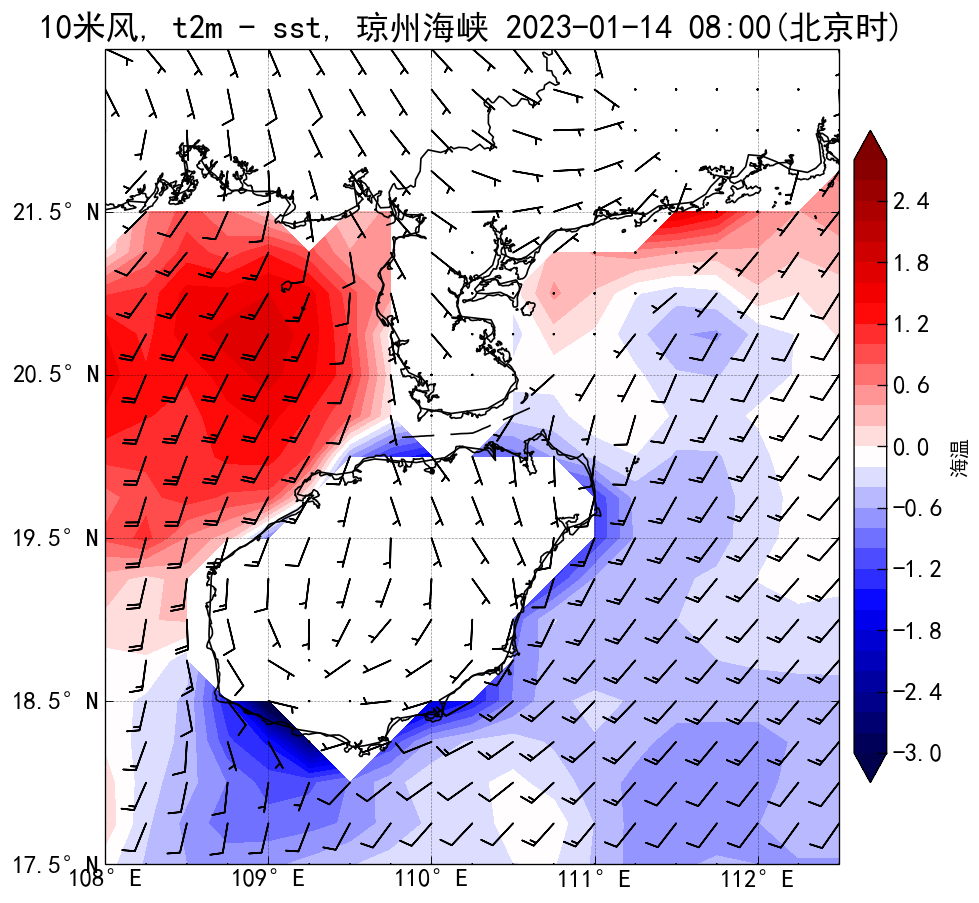

In [71]:
plt.clf()
lon=sst.coords['longitude'][:]#读取经度
lat=sst.coords['latitude'][:]#读取纬度
# lons,lats=np.meshgrid(lon,lat)#网格化
figure = plt.figure(figsize=(16, 9), dpi=120)  # 加载画布
map_fig = plt.axes(projection=ccrs.PlateCarree())  # 设置投影方式
shpFilePath01  = os.path.join(shapefiles_dir, './natural_earth/physical/ne_50m_coastline.shp')
coastmap = shpreader.Reader(shpFilePath01).geometries()  # 读取地图数据

map_fig.add_geometries(coastmap, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')  # 设置边界样式

shpFilePath02  = os.path.join(shapefiles_dir, './china_basic_map/bou2_4l.shp')
chinamap = shpreader.Reader(shpFilePath02).geometries()  # 读取地图数据
map_fig.set_extent([108, 112.5, 17.5, 22.5], crs=ccrs.PlateCarree())  # 设置绘图范围
map_fig.add_geometries(chinamap, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='black')  # 设置边界样式
map_fig.set_xticks([108, 109, 110,111,112])  # 需要显示的经度，一般可用np.arange
map_fig.set_yticks([17.5, 18.5, 19.5, 20.5,21.5])  # 需要显示的纬度
map_fig.xaxis.set_major_formatter(LongitudeFormatter())  # 将横坐标转换为经度格式
map_fig.yaxis.set_major_formatter(LatitudeFormatter())  # 将纵坐标转换为纬度格式
map_fig.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)  # 修改刻度样式
map_fig.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

# 填色图
range_cf = np.arange(-3.0, 3, 0.2)
# sst_cf = map_fig.contourf(lon, lat, sst_sd-273.15, levels=range_sst_cf, cmap='rainbow',extend='both')
cf = map_fig.contourf(lon, lat, t2m_sd-sst_sd, levels=range_cf,cmap='seismic',extend='both')
step = 1
uv_barb = map_fig.barbs(lon[::step], lat[::step], 
        u10_sd[::step,::step],v10_sd[::step,::step],barb_increments={'half':2,'full':4,'flag':20},
        length=6,sizes={'emptybarb':0.01}
        )
# 色标
cb = figure.colorbar(cf, extend='max', shrink=0.8, pad=0.01)
cb.set_label('海温', fontdict={'size': 12})
cb.ax.tick_params(which='major', direction='in', length=6, labelsize=15)

# 设置文字标题 Set the titles and axes labels
utcTime = arrow.get(time_selected)
bjTime = utcTime.shift(hours=8)
map_fig.set_title(f'10米风, t2m - sst, 琼州海峡 {bjTime.format("YYYY-MM-DD HH:00")}(北京时)', fontsize=20)

# 保存图像
# imgDir = os.path.join('H:/github/python/seafog/img/2023/', f'./01/')
# imgDir = os.path.normpath(imgDir)
# imgPath = os.path.join(imgDir, f'sst_{bjTime.format("YYYYMMDDHH")}.jpg')
# plt.savefig(imgPath, format='jpg', bbox_inches='tight', transparent=True)
# print('保存图片: ' + imgPath)
plt.show()
plt.close(figure)

In [77]:
# 相对湿度色标
colorArr_rhum = [
    [0.541176471, 0.31372549, 0.078431373],
    [0.611764706, 0.380392157, 0.121568627],
    [0.674509804, 0.439215686, 0.160784314],
    [0.745098039, 0.505882353, 0.207843137],
    [0.784313725, 0.584313725, 0.298039216],
    [0.82745098, 0.674509804, 0.403921569],
    [0.866666667, 0.756862745, 0.498039216],
    [0.901960784, 0.811764706, 0.592156863],
    [0.933333333, 0.858823529, 0.674509804],
    [0.964705882, 0.909803922, 0.77254902],
    [0.964705882, 0.925490196, 0.831372549],
    [0.960784314, 0.945098039, 0.894117647],
    [0.956862745, 0.960784314, 0.960784314],
    [0.901960784, 0.960784314, 0.819607843],
    [0.780392157, 0.909803922, 0.635294118],
    [0.647058824, 0.835294118, 0.454901961],
    [0.501960784, 0.737254902, 0.28627451],
    [0.37254902, 0.62745098, 0.203921569],
    [0.254901961, 0.51372549, 0.149019608],
    [0.101960784, 0.207843137, 0.070588235],
]
colorArr_rhum.reverse()
clrmap_rhum = mcolors.ListedColormap(colorArr_rhum)

<Figure size 432x288 with 0 Axes>

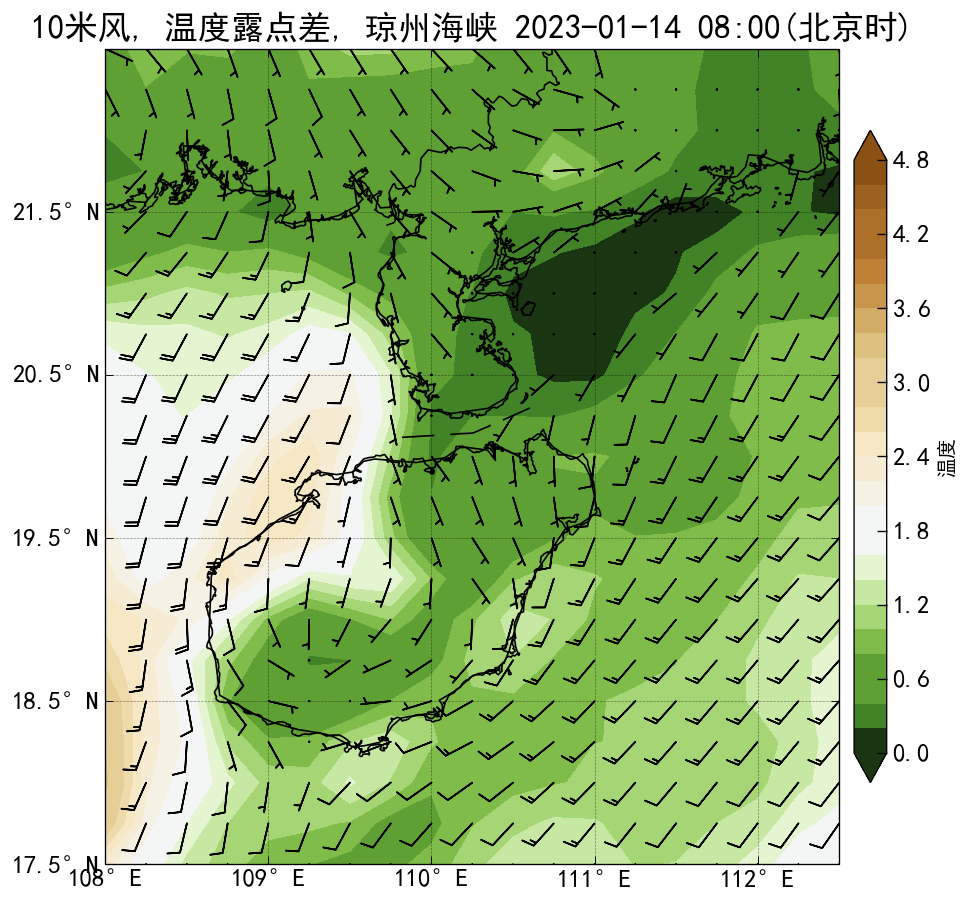

In [78]:
plt.clf()
lon=sst.coords['longitude'][:]#读取经度
lat=sst.coords['latitude'][:]#读取纬度
# lons,lats=np.meshgrid(lon,lat)#网格化
figure = plt.figure(figsize=(16, 9), dpi=120)  # 加载画布
map_fig = plt.axes(projection=ccrs.PlateCarree())  # 设置投影方式
shpFilePath01  = os.path.join(shapefiles_dir, './natural_earth/physical/ne_50m_coastline.shp')
coastmap = shpreader.Reader(shpFilePath01).geometries()  # 读取地图数据

map_fig.add_geometries(coastmap, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black')  # 设置边界样式

shpFilePath02  = os.path.join(shapefiles_dir, './china_basic_map/bou2_4l.shp')
chinamap = shpreader.Reader(shpFilePath02).geometries()  # 读取地图数据
map_fig.set_extent([108, 112.5, 17.5, 22.5], crs=ccrs.PlateCarree())  # 设置绘图范围
map_fig.add_geometries(chinamap, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='black')  # 设置边界样式
map_fig.set_xticks([108, 109, 110,111,112])  # 需要显示的经度，一般可用np.arange
map_fig.set_yticks([17.5, 18.5, 19.5, 20.5,21.5])  # 需要显示的纬度
map_fig.xaxis.set_major_formatter(LongitudeFormatter())  # 将横坐标转换为经度格式
map_fig.yaxis.set_major_formatter(LatitudeFormatter())  # 将纵坐标转换为纬度格式
map_fig.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)  # 修改刻度样式
map_fig.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

# 填色图
range_cf = np.arange(0, 5, 0.2)
# sst_cf = map_fig.contourf(lon, lat, sst_sd-273.15, levels=range_sst_cf, cmap='rainbow',extend='both')
cf = map_fig.contourf(lon, lat, t2m_sd - d2m_sd, levels=range_cf,cmap=clrmap_rhum,extend='both')
step = 1
uv_barb = map_fig.barbs(lon[::step], lat[::step], 
        u10_sd[::step,::step],v10_sd[::step,::step],barb_increments={'half':2,'full':4,'flag':20},
        length=6,sizes={'emptybarb':0.01}
        )
# 色标
cb = figure.colorbar(cf, extend='max', shrink=0.8, pad=0.01)
cb.set_label('温度', fontdict={'size': 12})
cb.ax.tick_params(which='major', direction='in', length=6, labelsize=15)

# 设置文字标题 Set the titles and axes labels
utcTime = arrow.get(time_selected)
bjTime = utcTime.shift(hours=8)
map_fig.set_title(f'10米风, 温度露点差, 琼州海峡 {bjTime.format("YYYY-MM-DD HH:00")}(北京时)', fontsize=20)

# 保存图像
# imgDir = os.path.join('H:/github/python/seafog/img/2023/', f'./01/')
# imgDir = os.path.normpath(imgDir)
# imgPath = os.path.join(imgDir, f'sst_{bjTime.format("YYYYMMDDHH")}.jpg')
# plt.savefig(imgPath, format='jpg', bbox_inches='tight', transparent=True)
# print('保存图片: ' + imgPath)
plt.show()
plt.close(figure)

In [ ]:
import xarray as xr

# 读取netCDF文件
ds = xr.open_dataset('path/to/file.nc')

# 指定目标经纬度
target_lat = ...
target_lon = ...

# 找到最接近目标经纬度的网格点
lat_idx = ds['latitude'].sel(latitude=target_lat, method='nearest').item()
lon_idx = ds['longitude'].sel(longitude=target_lon, method='nearest').item()

# 反向追踪气团
for t in range(len(ds['time'])-1, -1, -1):
    # 计算气团的位移量
    dlat = ds['v_wind'][t, lat_idx, lon_idx] * 3600  # 单位：米/小时
    dlon = ds['u_wind'][t, lat_idx, lon_idx] * 3600  # 单位：米/小时

    # 计算新的经纬度
    new_lat = ds['latitude'][lat_idx].item() - dlat / 111000  # 单位：度
    new_lon = ds['longitude'][lon_idx].item() - dlon / (111000 * np.cos(np.deg2rad(ds['latitude'][lat_idx].item())))  # 单位：度

    # 更新索引
    lat_idx = ds['latitude'].sel(latitude=new_lat, method='nearest').item()
    lon_idx = ds['longitude'].sel(longitude=new_lon, method='nearest').item()

    # 输出结果
    print(f't={t}, lat={new_lat}, lon={new_lon}')